# Systems of Differential Equations and Partial Differential Equations

(adapted from CHEM 1000 - Spring 2023 Prof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 12 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

This notebook also includes additional material, including systems of differential equations (using numeric integration).

By the end of this session, you should be able to:
- Understand separable partial differential equations
- Understand how to use `scipy.integrate` and `odeint` to integrate systems of differential equations

## Partial Differential Equations

There are several notable partial differential equations in physics and chemistry:
- Classical Heat Equation
- Classical Diffusion
- Classical Wave Equation

Section A.12 in the textbook has a nice survey and justification of the formulas for each.

Let's concentrate on the classical wave equation (the solution to the heat equation is similar)

$$
\frac{\partial^{2} h(x, t)}{\partial t^{2}}=v^{2} \frac{\partial^{2} h(x, t)}{\partial x^{2}}
$$

That is, the displacement of a string $h(x,t)$ depends on both position and time (i.e., it oscillates).

We can perhaps assume both ends of the string are tied down, so the boundary conditions would be $h(0, t) = h(L, t) = 0$

Let's assume that we can write $h(x,t)$ as the **separable** product of two functions:

$$
h(x, t)=X(x) T(t)
$$

Maybe this is true, maybe not, but let's plug it back into the PDE:

$$
X(x) \frac{d^{2} T(t)}{d t^{2}}=v^{2} T(t) \frac{d^{2} X(x)}{d x^{2}}
$$

Notice that we can now change our partial derivatives into two equal second order ordinary differential equations.

We can simplify:

$$
\frac{1}{v^{2} T(t)} \frac{d^{2} T(t)}{d t^{2}}=\frac{1}{X(x)} \frac{d^{2} X(x)}{d x^{2}}
$$

Since time and space are independent variables, this can only be true if both are equal to a constant:

$$
\frac{1}{v^{2} T(t)} \frac{d^{2} T(t)}{d t^{2}}=-k^{2}=\frac{1}{X(x)} \frac{d^{2} X(x)}{d x^{2}}
$$

Let's do these one at a time:

$$
\frac{d^{2} X(x)}{d x^{2}}=-k^{2} X(x)
$$

Nice, it's a second-order ordinary differential equation with constant coefficients!

Our *ansatz* will be:

$$
X(x)=a_{1} \cos (k x)+b_{1} \sin (k x)
$$

One boundary condition is that $h(0, t) = 0$ so:

$$
X(x)=b_{1} \sin (k x)
$$

Then:
$$
X(L)=b_{1} \sin (k L)=0
$$

So $k L$ can be any multiple of $\pi$:

$$
k^{2}=\frac{n^{2} \pi^{2}}{L^{2}} \quad n=1,2, \ldots
$$

Finally, our positions:

$$
X_{n}(x)=b_{n} \sin \left[\frac{n \pi}{L} x\right] \quad n=1,2, \ldots
$$

What about time?

$$
\frac{d^{2} T(t)}{d t^{2}}=-v^{2} k^{2} T(t)
$$

But we just solved for $k$ so:

$$
\frac{d^{2} T(t)}{d t^{2}}=-v^{2} \frac{n^{2} \pi^{2}}{L^{2}} T(t) \quad n=1,2, \ldots
$$

We don't have any boundary conditions for time, so:

$$
T_{n}(t)=c_{n} \cos \left(\frac{n \pi}{L} v t\right)+d_{n} \sin \left(\frac{n \pi}{L} v t\right)
$$

This leaves us with an extremely general solution for $h$:

$$
\begin{aligned}
h(x, t) &=\sum_{n=1}^{\infty} X_{n}(x) T_{n}(t) \\
&=\sum_{n=1}^{\infty} b_{n} \sin \left[\frac{n \pi}{L} x\right] \times\left[c_{n} \cos \left(\frac{n \pi}{L} v t\right)+d_{n} \sin \left(\frac{n \pi}{L} v t\right)\right] \\
&=\sum_{n=1}^{\infty} \sin \left[\frac{n \pi}{L} x\right]\left[s_{n} \cos \left(\omega_{n} t\right)+t_{n} \sin \left(\omega_{n} t\right)\right]
\end{aligned}
$$


We'll come back to this idea of an oscillation / string being described by a sum of $\sin$ and $\cos$ functions soon.

## Lotka-Volterra (Predator-Prey)

I live near Frick Park. Over the summer, we had many rabbits come visit (to eat my garden) and I also saw several foxes - there's a small group in and around Homewood cemetery.

Not surprisingly, I saw more bunnies in the spring, and fewer later in the summer...

[Wikipedia](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)
>The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:

$$
\begin{aligned}
\frac{d x}{d t} &=\alpha x-\beta x y \\
\frac{d y}{d t} &=\delta x y-\gamma y
\end{aligned}
$$

Notice that these are ordinary differential equations because *time* is the variable to integrate, not $x$ or $y$, which are coupled, but not integrated.

As I've written them, $x$ is the prey, e.g. rabbits (this one was recently watching me record a video for class - thus the reflection in the window):

<img src="./images/driveway-bunny.jpg" width="400" />

So then, $y$ is the predator:

<img src="./images/frick-fox1.jpg" width="400" />

For the other parameters, $\alpha$ represents the constant growth rate of prey (e.g. exponential growth), and $-\beta x y$ is death due to predators (and thus proportional to interactions of both species). Predators increase in number if there are enough prey $\delta x y$ and have a constant death or migration rate $-\gamma y$.

Generally, the easiest method is to do numeric integration. In Python, we can use `scipy.integrate` specifically `odeint` for that:

In [1]:
import numpy as np

# we need `odeint` for integrating ordinary differential equations
from scipy.integrate import odeint

In [2]:
# Definition of parameters
alpha = 1.
beta = 0.1
gamma = 0.05
delta = 0.5

# time steps (months? years maybe??)
t = np.arange(0.0, 45.0, 0.01) # remember t = time from 0 to 40.0 with 0.01 increments

Now we have to define the function to integrate - which is packed into one "state" array

In [3]:
def f(state, t):
    x, y = state  # Unpack the state vector
    # dx/dt, dy/dt
    return alpha*x - beta*x*y, gamma*x*y - delta*y

Now we can integrate:

In [4]:
states = odeint(f, [10, 5], t)

Let's plot it!

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high-res images where supported

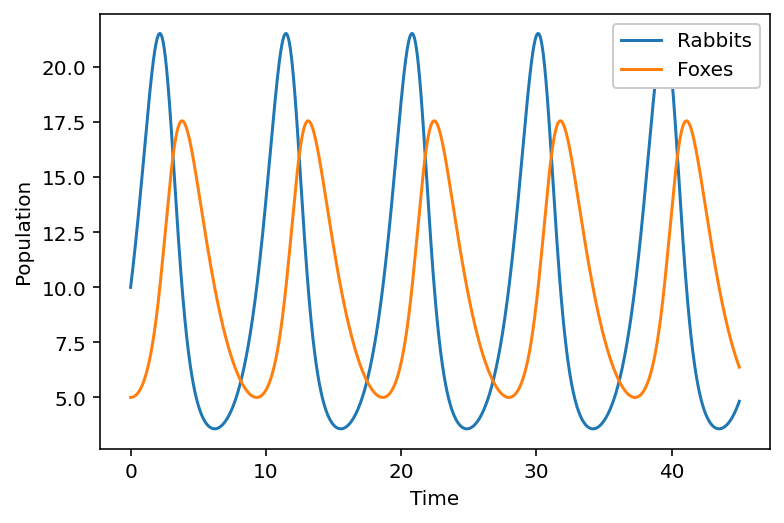

In [7]:
plt.plot(t, states[:, 0], label="Rabbits")
plt.plot(t, states[:, 1], label="Foxes")

plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(frameon=True, facecolor='white', framealpha=1)
plt.show()

Perhaps not surprisingly, the populations oscillate with slight offsets. The prey population goes up, then the predator population, etc.

We can examine this a bit more with a "phase plot." That is, rather than plotting time as the x-axis, we can plot the two populations as separate axes:

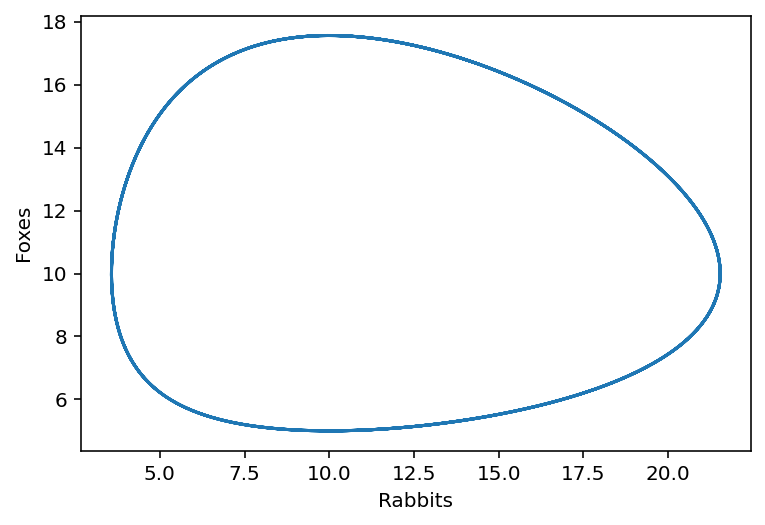

In [8]:
plt.plot(states[:, 0], states[:, 1])

plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.show()

We might wonder what controls the size of the "circuit"? Some depends on the $\alpha$, $\beta$, etc. parameters, but also the initial populations.

Here are a few phase plots with different initial states:

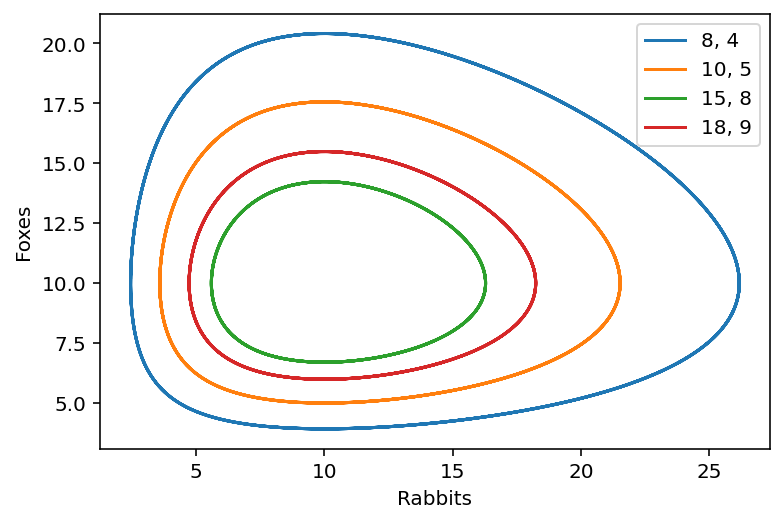

In [9]:
states1 = odeint(f, [8, 4], t)
plt.plot(states1[:, 0], states1[:, 1], label="8, 4")

states2 = odeint(f, [10, 5], t)
plt.plot(states2[:, 0], states2[:, 1], label="10, 5")

states3 = odeint(f, [15, 8], t)
plt.plot(states3[:, 0], states3[:, 1], label="15, 8")

states4 = odeint(f, [18, 9], t)
plt.plot(states4[:, 0], states4[:, 1], label="18, 9")

plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.legend()
plt.show()

It looks like there might be an equilibrium point in the middle. How do we find it?

At that point, both:

$$
\frac{dx}{dt} = \frac{dy}{dt} = 0
$$

Because, by definition, at equilibrium, the number of each won't change.

That gives us:

$$
\begin{array}{l}
x(\alpha-\beta y)=0 \\
-y(\gamma-\delta x)=0
\end{array}
$$

This could obviously be true if both $x$ and $y$ are zero (i.e., both species go extinct!) but a more interesting example yields:

$$
x=\frac{\gamma}{\delta}, y=\frac{\alpha}{\beta}
$$

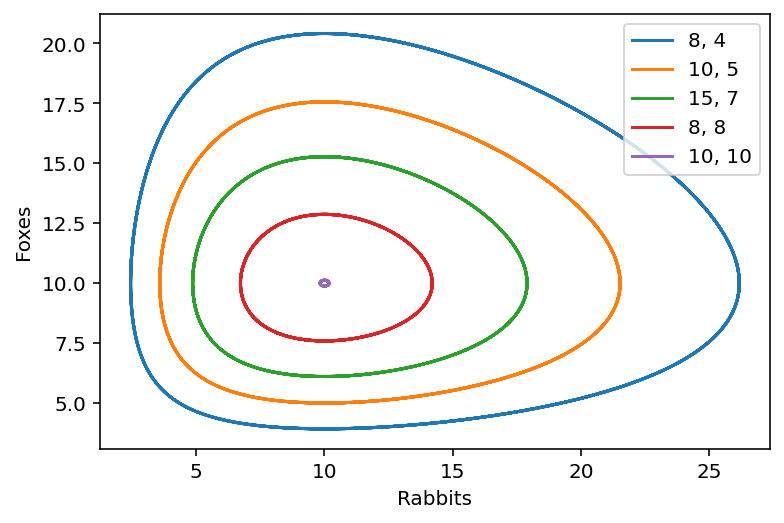

In [10]:
states1 = odeint(f, [8, 4], t)
plt.plot(states1[:, 0], states1[:, 1], label="8, 4")

states2 = odeint(f, [10, 5], t)
plt.plot(states2[:, 0], states2[:, 1], label="10, 5")

states3 = odeint(f, [15, 7], t)
plt.plot(states3[:, 0], states3[:, 1], label="15, 7")

states4 = odeint(f, [8, 8], t)
plt.plot(states4[:, 0], states4[:, 1], label="8, 8")

states5 = odeint(f, [9.9, 9.9], t)
plt.plot(states5[:, 0], states5[:, 1], label="10, 10")

plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.legend()
plt.show()

We've added a very small loop around 10,10 for the equilibrium point.

Notice that it doesn't matter exactly where you start on the loop.. it's the ratio of $x$ and $y$ and the parameters that matter.

The model was initially formulated by [Alfred Lotka](https://en.wikipedia.org/wiki/Alfred_J._Lotka) in te context of chemical reactions. At the same time, a similar model was developed by [Volterra](https://en.wikipedia.org/wiki/Vito_Volterra).

A variety of chemical oscillatory systems are known, for example the [Belousov-Zhaabotisnky (BZ) system](https://en.wikipedia.org/wiki/Belousov%E2%80%93Zhabotinsky_reaction) and various [clock reactions](https://en.wikipedia.org/wiki/Iodine_clock_reaction).

## Lorenz System / Lorenz Attractor

In 1963, Edward Lorenz, with the help of [Ellen Fetter](https://en.wikipedia.org/wiki/Ellen_Fetter), who did many of the computations, established a simple model of atmospheric convection - to help with modeling weather:

$$
\begin{aligned}
\frac{\mathrm{d} x}{\mathrm{d} t} &=\sigma(y-x) \\
\frac{\mathrm{d} y}{\mathrm{d} t} &=x(\rho-z)-y \\
\frac{\mathrm{d} z}{\mathrm{d} t} &=x y-\beta z
\end{aligned}
$$

[Wikipedia](https://en.wikipedia.org/wiki/Lorenz_system):
> The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above. In particular, the equations describe the rate of change of three quantities with respect to time: $x$ is proportional to the rate of convection, $y$ to the horizontal temperature variation, and $z$ to the vertical temperature variation

Notice there are three parameters: $\sigma$ and $\rho$ relate aspects of the convection and $\beta$ relates to the size of the system.

We can also solve these systems of equations through numeric integration.

In [11]:
# We want to plot 3 variables
# Axes3D naturally let us plot in 3D
from mpl_toolkits.mplot3d import Axes3D

First, let's set up our parameters. We're going to use these values for the constants.

We'll also create an array of time values.. for now, from 0 to 40 with 0.01 increments:

In [12]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

t = np.arange(0.0, 40.0, 0.01) # remember t = time from 0 to 40.0 with 0.01 increments

We have to define the function to integrate. In this case, it's three functions, so we pack (x, y, z) into a "state" vector (i.e., the state of the system), and return the derivatives

In [13]:
def f(state, t):
    x, y, z = state  # Unpack the state vector
    # dx/dt, dy/dt, dz/dt (note the commas)
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

In [14]:
state0 = [1.0, 1.0, 1.0] # initial conditions of x, y, z
# odeint will now numerically integrate f(state, t) and return the states at all times
states = odeint(f, state0, t)

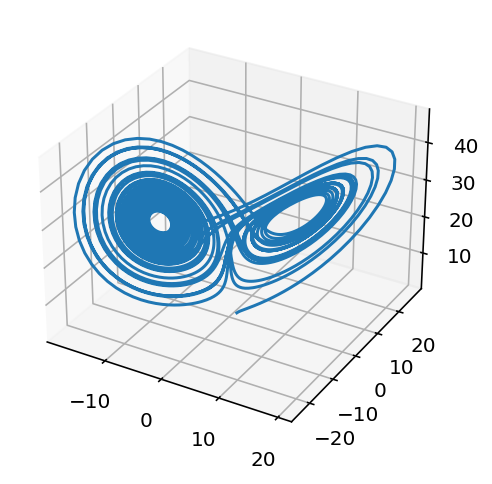

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

Well, it's a system describing convection. Note the swirling behavior. So far, so good.

What if our initial conditions are a little different?

In [17]:
new_states = odeint(f, [1.01, 1.0, 1.0], t)

Now, we'll overlap the two integrated systems on the same axes...

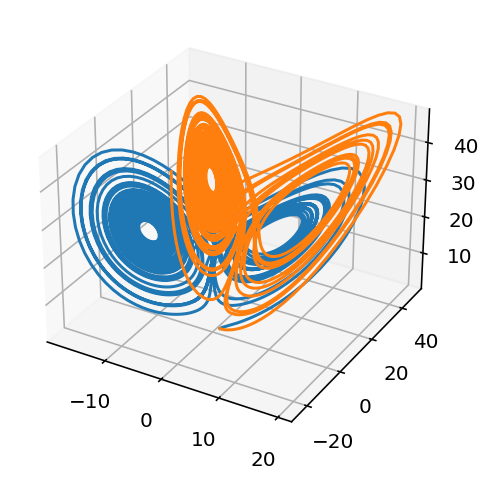

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
ax.plot(new_states[:,0], new_states[:,2], new_states[:,2])
plt.draw()
plt.show()

Wow.

We changed the initial X value by 0.01 in the new states, and the result is ***completely*** different.

There are still swirling behavior, but they end up in different regions of 3D space.

Let's just look at the first few time steps... (and make the difference even smaller...)

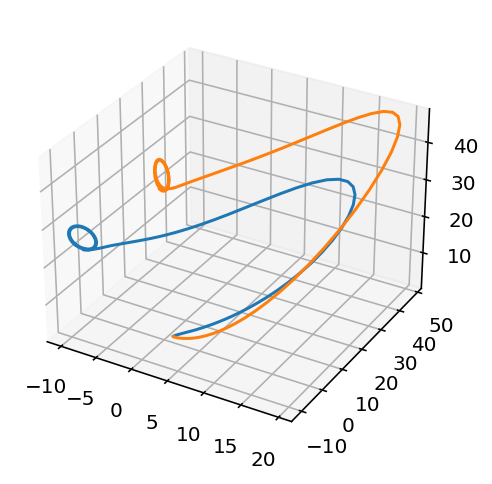

In [21]:
t = np.arange(0.0, 2.0, 0.01) # remember t = time from 0 to 10.0 with 0.01 increments
states = odeint(f, [1.0, 1.0, 1.0], t)
new_states = odeint(f, [1.001, 1.0, 1.0], t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
ax.plot(new_states[:,0], new_states[:,2], new_states[:,2])
plt.draw()
plt.show()

You might think it's qualitatively the same. Nice little arc, then a little loop... Let's integrate out to t = 20..

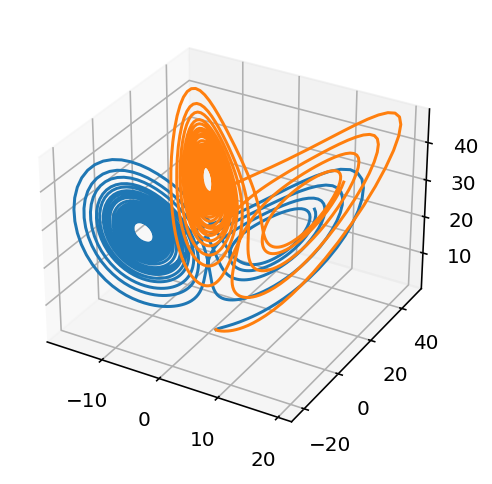

In [23]:
t = np.arange(0.0, 20.0, 0.01) # remember t = time from 0 to 20.0 with 0.01 increments
states = odeint(f, [1.0, 1.0, 1.0], t)
new_states = odeint(f, [1.001, 1.0, 1.0], t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
ax.plot(new_states[:,0], new_states[:,2], new_states[:,2])
plt.draw()
plt.show()

We can see that the Lorenz system is notable for **chaotic** behavior. Small differences in the initial conditions or parameters (even the method of numeric integration) can lead to large differences in behavior.

It's frequently cited as why weather is hard to predict, or the "butterfly effect" - that a butterfly flapping its wings can lead to changes in weather patterns.

Wikipedia:
>This underscores that physical systems can be completely deterministic and yet still be inherently unpredictable even in the absence of quantum effects. The shape of the Lorenz attractor itself, when plotted graphically, may also be seen to resemble a butterfly.

-------
This notebook is from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>